# Anomaly detection by Informer


## 1. Data preprocessing

In [95]:
import pandas as pd
attack = pd.read_csv('/home/hbdw/바탕화면/Informer2020/dataset/SWaT/SWaT_Dataset_Attack_v0.csv')
attack.date = pd.to_datetime(attack.date)
attack = attack.set_index('date')
attack

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
date,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 23:59:55,0.000000,559.3518,1,2,1,174.0259,8.613049,303.1274,2.461923,2,...,2,1,249.1829,0.736872,187.2917,0.000000,1,1,1,Normal
2016-01-01 23:59:56,0.000000,559.3518,1,2,1,174.0259,8.613049,303.1274,2.459616,2,...,2,1,249.1829,0.816967,187.2917,0.000000,1,1,1,Normal
2016-01-01 23:59:57,0.000000,559.3126,1,2,1,174.0259,8.613049,303.1274,2.459616,2,...,2,1,249.1829,0.816967,187.2917,0.000000,1,1,1,Normal


In [97]:
attack_x = attack.iloc[:, 0:-1]
attack_y = attack.iloc[:,-1]
attack_y = pd.DataFrame(list(map(int, attack_y=='Attack')), index=attack_y.index, columns = ['Normal/Attack'])
# csv 파일에서 label 'A ttack'으로 되어 있는거 바꿔줬음

In [118]:
# 라벨 전처리
target = 5 # target 이상이면 이상치로 설정
df_y = attack_y.iloc[:,0].resample('10S').sum()

for i in range(len(df_y)):
    if df_y.iloc[i] >= target:
        df_y.iloc[i] = 1
    else:
        df_y.iloc[i] = 0
df_y = pd.DataFrame(df_y)
df_y

,Normal/Attack
date,
2015-12-28 10:00:00,0
2015-12-28 10:00:10,0
2015-12-28 10:00:20,0
2015-12-28 10:00:30,0
2015-12-28 10:00:40,0
...,...
2016-01-01 23:59:10,0
2016-01-01 23:59:20,0
2016-01-01 23:59:30,0


In [119]:
# 총 이상치 개수
sum(df_y.iloc[:,0])

5149

In [153]:
# 날짜마다 이상치 개수 계산
# 29일까지 868개
# 30일까지 1175개
hap = 0
for i in range(len(df_y)):
    
    if df_y.iloc[i,0] == 1:
        hap += 1
    if hap > 1175:
        print(i)
        print(df_y.iloc[i])
        break

19973
Normal/Attack    1
Name: 2015-12-30 17:28:50, dtype: int64


In [173]:
df_y.iloc[22320, :] # 30일까지의 개수

Normal/Attack    0
Name: 2015-12-31 00:00:00, dtype: int64

In [174]:
# x 데이터 전처리
df = attack_x.iloc[:,0].resample('10S').mean()
for i in range(1, len(attack_x.columns)):
    df2 = attack_x.iloc[:,i].resample('10S').mean()
    df = pd.concat([df,df2], axis=1)

In [175]:
df

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
date,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.567050,523.57684,2.0,2.0,1.0,262.0161,8.394899,328.63370,2.443213,2.0,...,0.308439,2.0,1.0,250.81390,1.649953,189.56517,0.000128,1.0,1.0,1.0
2015-12-28 10:00:10,2.573968,523.04300,2.0,2.0,1.0,262.0161,8.391182,328.57986,2.441226,2.0,...,0.307325,2.0,1.0,251.17759,1.649953,189.93689,0.000128,1.0,1.0,1.0
2015-12-28 10:00:20,2.457099,523.54936,2.0,2.0,1.0,262.0161,8.390669,328.60806,2.439881,2.0,...,0.307069,2.0,1.0,251.15355,1.649953,189.88720,0.000128,1.0,1.0,1.0
2015-12-28 10:00:30,2.626429,524.55030,2.0,2.0,1.0,262.0161,8.391790,328.45683,2.439881,2.0,...,0.307338,2.0,1.0,250.84111,1.649953,189.58760,0.000128,1.0,1.0,1.0
2015-12-28 10:00:40,2.518784,525.61403,2.0,2.0,1.0,262.0161,8.389612,328.44402,2.439202,2.0,...,0.307434,2.0,1.0,250.67289,1.649953,189.43860,0.000128,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 23:59:10,0.000000,579.01741,1.0,2.0,1.0,174.0259,8.615163,302.94284,2.463563,2.0,...,0.304391,2.0,1.0,248.87848,0.816967,187.17960,0.000000,1.0,1.0,1.0
2016-01-01 23:59:20,0.000000,574.91553,1.0,2.0,1.0,174.0259,8.619649,303.05050,2.462794,2.0,...,0.304391,2.0,1.0,248.97460,0.855413,187.24367,0.000000,1.0,1.0,1.0
2016-01-01 23:59:30,0.000000,570.61339,1.0,2.0,1.0,174.0259,8.614138,303.12742,2.461629,2.0,...,0.304391,2.0,1.0,248.97460,0.863422,187.26929,0.000000,1.0,1.0,1.0


In [176]:
import joblib
scaler = joblib.load('SWaT_standard_scaler.pkl')
trans_df = scaler.transform(df)
norm_data = pd.DataFrame(data=trans_df, index=df.index, columns=df.columns, dtype=None, copy=None)

In [106]:
for i in range(29884, 29884+7):
    norm_data.iloc[i] = norm_data.iloc[29883]

In [110]:
norm_data.iloc[29883:29884+10]

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
date,,,,,,,,,,,,,,,,,,,,,
2015-12-31 21:00:30,-1.627366,1.794705,-1.580819,-1.715045,0.0,-14.631047,2.773643,-0.945205,-1.716603,-1.68519,...,0.035700,0.094869,0.0,0.015771,-1.424249,-0.069940,-0.100168,0.0,-0.095457,0.0
2015-12-31 21:00:40,-1.627366,1.794705,-1.580819,-1.715045,0.0,-14.631047,2.773643,-0.945205,-1.716603,-1.68519,...,0.035700,0.094869,0.0,0.015771,-1.424249,-0.069940,-0.100168,0.0,-0.095457,0.0
2015-12-31 21:00:50,-1.627366,1.794705,-1.580819,-1.715045,0.0,-14.631047,2.773643,-0.945205,-1.716603,-1.68519,...,0.035700,0.094869,0.0,0.015771,-1.424249,-0.069940,-0.100168,0.0,-0.095457,0.0
2015-12-31 21:01:00,-1.627366,1.794705,-1.580819,-1.715045,0.0,-14.631047,2.773643,-0.945205,-1.716603,-1.68519,...,0.035700,0.094869,0.0,0.015771,-1.424249,-0.069940,-0.100168,0.0,-0.095457,0.0
2015-12-31 21:01:10,-1.627366,1.794705,-1.580819,-1.715045,0.0,-14.631047,2.773643,-0.945205,-1.716603,-1.68519,...,0.035700,0.094869,0.0,0.015771,-1.424249,-0.069940,-0.100168,0.0,-0.095457,0.0
2015-12-31 21:01:20,-1.627366,1.794705,-1.580819,-1.715045,0.0,-14.631047,2.773643,-0.945205,-1.716603,-1.68519,...,0.035700,0.094869,0.0,0.015771,-1.424249,-0.069940,-0.100168,0.0,-0.095457,0.0
2015-12-31 21:01:30,-1.627366,1.794705,-1.580819,-1.715045,0.0,-14.631047,2.773643,-0.945205,-1.716603,-1.68519,...,0.035700,0.094869,0.0,0.015771,-1.424249,-0.069940,-0.100168,0.0,-0.095457,0.0
2015-12-31 21:01:40,-1.627366,1.794705,-1.580819,-1.715045,0.0,-14.631047,2.773643,-0.945205,-1.716603,-1.68519,...,0.035700,0.094869,0.0,0.015771,-1.424249,-0.069940,-0.100168,0.0,-0.095457,0.0
2015-12-31 21:01:50,-1.627366,1.795190,-1.580819,-1.715045,0.0,-14.614197,2.753945,-0.945205,-1.716603,-1.68519,...,0.012815,0.094869,0.0,0.016276,-0.952284,-0.069940,-0.100168,0.0,-0.095457,0.0


In [111]:
norm_data

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
date,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,0.636994,-0.475350,0.620054,0.585495,0.0,-0.288165,0.065254,-0.478287,0.578837,0.582933,...,0.081278,0.094869,0.0,-0.025609,1.938500,-0.072769,-0.099289,0.0,-0.095457,0.0
2015-12-28 10:00:10,0.643096,-0.479546,0.620054,0.585495,0.0,-0.288165,0.028896,-0.479263,0.576971,0.582933,...,0.043098,0.094869,0.0,-0.009549,1.938500,-0.051582,-0.099289,0.0,-0.095457,0.0
2015-12-28 10:00:20,0.540008,-0.475566,0.620054,0.585495,0.0,-0.288165,0.023881,-0.478752,0.575707,0.582933,...,0.034322,0.094869,0.0,-0.010610,1.938500,-0.054414,-0.099289,0.0,-0.095457,0.0
2015-12-28 10:00:30,0.689372,-0.467699,0.620054,0.585495,0.0,-0.288165,0.034850,-0.481493,0.575707,0.582933,...,0.043538,0.094869,0.0,-0.024407,1.938500,-0.071491,-0.099289,0.0,-0.095457,0.0
2015-12-28 10:00:40,0.594420,-0.459338,0.620054,0.585495,0.0,-0.288165,0.013538,-0.481725,0.575068,0.582933,...,0.046828,0.094869,0.0,-0.031836,1.938500,-0.079983,-0.099289,0.0,-0.095457,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 23:59:10,-1.627366,-0.039593,-1.580819,0.585495,0.0,-16.483826,2.219841,-0.943904,0.597956,0.582933,...,-0.057400,0.094869,0.0,-0.111075,-1.640567,-0.208742,-0.100168,0.0,-0.095457,0.0
2016-01-01 23:59:20,-1.627366,-0.071834,-1.580819,0.585495,0.0,-16.483826,2.263723,-0.941953,0.597234,0.582933,...,-0.057400,0.094869,0.0,-0.106830,-1.475379,-0.205090,-0.100168,0.0,-0.095457,0.0
2016-01-01 23:59:30,-1.627366,-0.105648,-1.580819,0.585495,0.0,-16.483826,2.209812,-0.940559,0.596139,0.582933,...,-0.057400,0.094869,0.0,-0.106830,-1.440964,-0.203630,-0.100168,0.0,-0.095457,0.0


In [112]:
norm_data.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,...,39600.000000,39600.000000,39600.0,39600.000000,39600.000000,39600.000000,39600.000000,39600.0,39600.000000,39600.0
mean,-0.131814,0.206667,-0.132639,-0.138060,0.007891,-8.843800,1.233278,-0.581772,-0.134786,-0.133324,...,-0.848054,-0.793504,0.0,-0.944508,-0.708087,-1.012132,0.010562,0.0,0.009810,0.0
std,1.055848,1.003965,1.056781,1.065998,0.088294,6.309012,1.117438,0.287510,1.068181,1.063042,...,2.908721,2.942717,0.0,2.889338,1.858694,2.869516,1.055416,0.0,1.047324,0.0
min,-1.627366,-3.095045,-3.781692,-1.715045,0.000000,-16.503882,-23.361189,-1.262988,-1.716603,-3.499689,...,-10.484744,-10.545936,0.0,-10.680289,-5.150807,-10.694961,-0.100168,0.0,-0.095457,0.0
25%,-1.627366,-0.579191,-1.580819,-1.715045,0.000000,-15.616839,0.296578,-0.770982,-1.716603,-1.685190,...,-0.003420,0.094869,0.0,-0.156212,-1.640567,-0.239794,-0.100168,0.0,-0.095457,0.0
50%,0.567525,-0.412026,0.620054,0.585495,0.000000,-9.948941,1.245827,-0.544724,0.581143,0.582933,...,0.019840,0.094869,0.0,-0.090451,-0.952284,-0.169295,-0.100168,0.0,-0.095457,0.0
75%,0.638096,1.219001,0.620054,0.585495,0.000000,-1.025389,2.085374,-0.413477,0.587493,0.582933,...,0.058239,0.094869,0.0,-0.014837,1.036853,-0.088202,-0.099289,0.0,-0.095457,0.0
max,0.742343,2.645463,0.620054,0.585495,1.000000,0.361204,3.260767,0.521334,0.937980,0.582933,...,0.183094,0.094869,0.0,0.128694,2.626784,0.059736,12.255589,0.0,11.774046,0.0


In [114]:
norm_data.to_csv("./dataset/SWaT/SWaT_Attack_standard_normalised_normal.csv", mode='w')
df_y.to_csv("./dataset/SWaT/SWaT_Attack_label.csv", mode='w')

In [1]:
import pandas as pd
norm_data = pd.read_csv("./dataset/SWaT/SWaT_Attack_standard_normalised_normal.csv")
norm_data.date = pd.to_datetime(norm_data.date)
norm_data = norm_data.set_index('date')

In [3]:
norm_data.iloc[:,0][norm_data.iloc[:,0].isnull()]

Series([], Name: FIT101, dtype: float64)

In [2]:
df_y = pd.read_csv("./dataset/SWaT/SWaT_Attack_label.csv")
df_y.date = pd.to_datetime(df_y.date)
df_y = df_y.set_index('date')

In [ ]:
# 일단 안해줘도 될듯 
val_df = norm_data.iloc[37440:37440+6120]
test_df = norm_data.iloc[37440+6120:]

### 시각화

In [3]:
norm_data

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
date,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,0.636994,-0.475350,0.620054,0.585495,0.0,-0.288165,0.065254,-0.478287,0.578837,0.582933,...,0.081278,0.094869,0.0,-0.025609,1.938500,-0.072769,-0.099289,0.0,-0.095457,0.0
2015-12-28 10:00:10,0.643096,-0.479546,0.620054,0.585495,0.0,-0.288165,0.028896,-0.479263,0.576971,0.582933,...,0.043098,0.094869,0.0,-0.009549,1.938500,-0.051582,-0.099289,0.0,-0.095457,0.0
2015-12-28 10:00:20,0.540008,-0.475566,0.620054,0.585495,0.0,-0.288165,0.023881,-0.478752,0.575707,0.582933,...,0.034322,0.094869,0.0,-0.010610,1.938500,-0.054414,-0.099289,0.0,-0.095457,0.0
2015-12-28 10:00:30,0.689372,-0.467699,0.620054,0.585495,0.0,-0.288165,0.034850,-0.481493,0.575707,0.582933,...,0.043538,0.094869,0.0,-0.024407,1.938500,-0.071491,-0.099289,0.0,-0.095457,0.0
2015-12-28 10:00:40,0.594420,-0.459338,0.620054,0.585495,0.0,-0.288165,0.013538,-0.481725,0.575068,0.582933,...,0.046828,0.094869,0.0,-0.031836,1.938500,-0.079983,-0.099289,0.0,-0.095457,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 23:59:10,-1.627366,-0.039593,-1.580819,0.585495,0.0,-16.483826,2.219841,-0.943904,0.597956,0.582933,...,-0.057400,0.094869,0.0,-0.111075,-1.640567,-0.208742,-0.100168,0.0,-0.095457,0.0
2016-01-01 23:59:20,-1.627366,-0.071834,-1.580819,0.585495,0.0,-16.483826,2.263723,-0.941953,0.597234,0.582933,...,-0.057400,0.094869,0.0,-0.106830,-1.475379,-0.205090,-0.100168,0.0,-0.095457,0.0
2016-01-01 23:59:30,-1.627366,-0.105648,-1.580819,0.585495,0.0,-16.483826,2.209812,-0.940559,0.596139,0.582933,...,-0.057400,0.094869,0.0,-0.106830,-1.440964,-0.203630,-0.100168,0.0,-0.095457,0.0


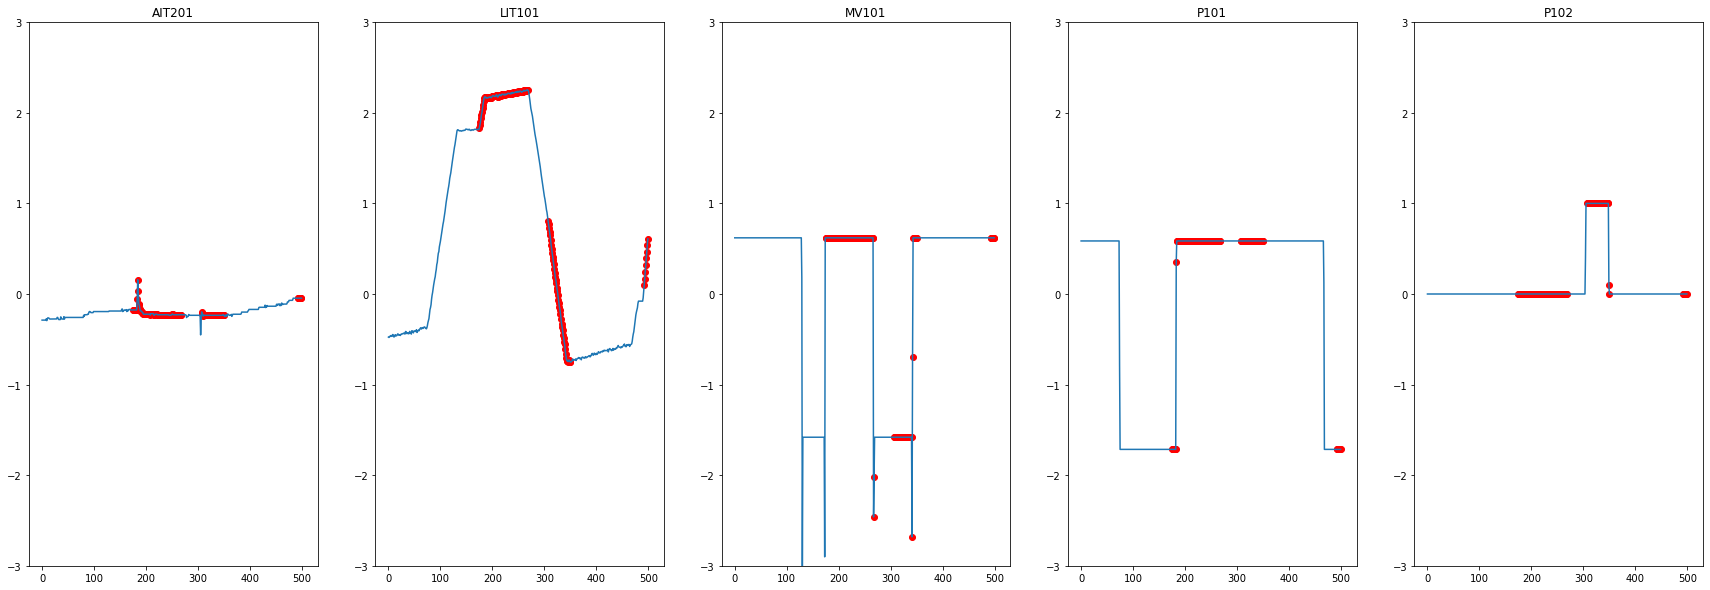

In [102]:
import numpy as np
import matplotlib.pyplot as plt

idx = 500
plot_y_1 = list(norm_data[' AIT201'])[:idx]
plot_y_2 = list(norm_data['LIT101'])[:idx]
plot_y_3 = list(norm_data[' MV101'])[:idx]
plot_y_4 = list(norm_data['P101'])[:idx]
plot_y_5 = list(norm_data['P102'])[:idx]
plot_x = np.arange(idx)

normal_attack = list(df_y['Normal/Attack'])[:idx]
normal = np.logical_not(normal_attack)
attack = np.logical_not(normal)

plt.figure(figsize=(30, 10))

plt.subplot(1, 5, 1)
plt.ylim([-3.0, 3.0])    
plt.plot(plot_x, plot_y_1)
plt.scatter(plot_x[attack], np.array(plot_y_1)[attack], color='red')
plt.title('AIT201')

plt.subplot(1, 5, 2)
plt.ylim([-3.0, 3.0])    
plt.plot(plot_x, plot_y_2)
plt.scatter(plot_x[attack], np.array(plot_y_2)[attack], color='red')
plt.title('LIT101')

plt.subplot(1, 5, 3)
plt.ylim([-3.0, 3.0])    
plt.plot(plot_x, plot_y_3)
plt.scatter(plot_x[attack], np.array(plot_y_3)[attack], color='red')
plt.title('MV101')

plt.subplot(1, 5, 4)
plt.ylim([-3.0, 3.0])    
plt.plot(plot_x, plot_y_4)
plt.scatter(plot_x[attack], np.array(plot_y_4)[attack], color='red')
plt.title('P101')

plt.subplot(1, 5, 5)
plt.ylim([-3.0, 3.0])    
plt.plot(plot_x, plot_y_5)
plt.scatter(plot_x[attack], np.array(plot_y_5)[attack], color='red')
plt.title('P102')

plt.show()

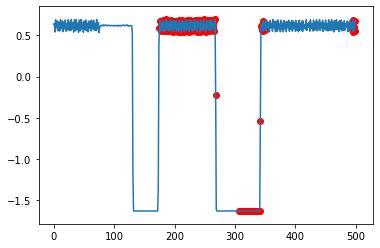

In [75]:

plt.plot(plot_x, plot_y_1)
plt.scatter(plot_x[attack], np.array(plot_y_1)[attack], color='red')

In [72]:
plot_x[attack]

array([175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
       266, 267, 268, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
       317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
       330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 350, 492, 493, 494, 495, 496,
       497, 498, 499])

array([ 0.6369943 ,  0.64309649,  0.54000784,  0.6893718 ,  0.59441961,
        0.59091658,  0.6744551 ,  0.55430302,  0.65866284,  0.63210657,
        0.55252315,  0.69004995,  0.57636709,  0.6247049 ,  0.67533101,
        0.54435855,  0.66315469,  0.61956321,  0.57786443,  0.68612307,
        0.55048923,  0.63962133,  0.638661  ,  0.56721386,  0.69081269,
        0.56017922,  0.65801301,  0.62202097,  0.55596981,  0.69329885,
        0.57503937,  0.61066393,  0.65631773,  0.53916024,  0.68990864,
        0.61919591,  0.55594167,  0.68985218,  0.56772229,  0.63049641,
        0.65193905,  0.53735223,  0.68564269,  0.61964789,  0.5540488 ,
        0.69228163,  0.57681925,  0.61789634,  0.65493347,  0.53760654,
        0.67389021,  0.6148452 ,  0.56698786,  0.68547324,  0.55670432,
        0.62306633,  0.64902913,  0.54387826,  0.67261912,  0.60580496,
        0.58515346,  0.6780713 ,  0.55303158,  0.67513334,  0.61433668,
        0.57656485,  0.68487977,  0.56263706,  0.64182522,  0.64

## 2.Time Series Forecasting 

In [1]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch
import os

ModuleNotFoundError: No module named 'torch'

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

In [3]:
# 12. Informerstack s_layers=[4,3,2,1], d_layers=4 (lr=0.0001), itr=0, output_attention = True, n_heads=24, lr을 0.6**으로 바꿈
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'SWaT' # data
args.root_path = './dataset/SWaT/' # root path of data file
args.data_path = 'SWaT_Attack_standard_normalised_normal.csv' # data file
args.features = 'M' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'FIT101' # target feature in S or MS task
args.freq = 's' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 6*60 # 지금 돌아가는게 StandardScaler. 이전거는 MinMaxScaler로 seq_len는 6*60*2 #24*7 # input sequence length of Informer encoder
args.label_len = 6*30 #48 # start token length of Informer decoder
args.pred_len = 6*10 #24 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

# 얘네들은 feature 개수 의미하는건가?
args.enc_in = 51 # encoder input size
args.dec_in = 51 # decoder input size
args.c_out = 51 # output size

args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 4 # num of encoder layers
args.d_layers = 2 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
#args.freq = 's'

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 50
args.patience = 5
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'


NameError: name 'torch' is not defined

In [10]:
# Exp = Exp_Informer
# exp = Exp(args)
# setting = 'informer_SWaT_ftM_sl1080_ll720_pl360_dm512_nh8_el6_dl2_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
# path = os.path.join(exp.args.checkpoints, setting)
# best_model_path = path+'/'+'checkpoint.pth'
# exp.model.load_state_dict(torch.load(best_model_path))

<All keys matched successfully>

In [4]:
import os
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
# from sklearn.preprocessing import StandardScaler

from utils.tools import StandardScaler
from utils.timefeatures import time_features

import warnings
warnings.filterwarnings('ignore')

class Dataset_SWaT_anomaly(Dataset):
    def __init__(self, root_path, flag='train', size=None, 
                 features='S', data_path='ETTh1.csv', 
                 target='OT', scale=False, inverse=False, timeenc=0, freq='h', cols=None, val_test_split=10000):
        # size [seq_len, label_len, pred_len]
        # info
        if size == None:
            self.seq_len = 24*4*4
            self.label_len = 24*4
            self.pred_len = 24*4
        else:
            self.seq_len = size[0]
            self.label_len = size[1]
            self.pred_len = size[2]
        # init
        assert flag in ['test', 'val']
        type_map = {'val':0, 'test':1}
        self.set_type = type_map[flag]
        
        self.features = features
        self.target = target
        self.scale = scale
        self.inverse = inverse
        self.timeenc = timeenc
        self.freq = freq
        
        self.root_path = root_path
        self.data_path = data_path
        self.val_test_split = val_test_split
        self.__read_data__()

    def __read_data__(self):
        self.scaler = StandardScaler()
        df_raw = pd.read_csv(os.path.join(self.root_path,
                                          self.data_path))
        border1s = [0, self.val_test_split - self.seq_len]
        border2s = [self.val_test_split, len(df_raw)]
        border1 = border1s[self.set_type]
        border2 = border2s[self.set_type]
        
        if self.features=='M' or self.features=='MS':
            cols_data = df_raw.columns[1:]
            df_data = df_raw[cols_data]
        elif self.features=='S':
            df_data = df_raw[[self.target]]

        if self.scale:
            train_data = df_data[border1s[0]:border2s[0]]
            self.scaler.fit(train_data.values)
            data = self.scaler.transform(df_data.values)
        else:
            data = df_data.values
            
        df_stamp = df_raw[['date']][border1:border2]
        df_stamp['date'] = pd.to_datetime(df_stamp.date)
        data_stamp = time_features(df_stamp, timeenc=self.timeenc, freq=self.freq)

        self.data_x = data[border1:border2]
        if self.inverse:
            self.data_y = df_data.values[border1:border2]
        else:
            self.data_y = data[border1:border2]
        self.data_stamp = data_stamp
    
    def __getitem__(self, index):
        s_begin = index
        s_end = s_begin + self.seq_len
        r_begin = s_end - self.label_len 
        r_end = r_begin + self.label_len + self.pred_len

        seq_x = self.data_x[s_begin:s_end]
        seq_y = self.data_y[r_begin:r_end]
        seq_x_mark = self.data_stamp[s_begin:s_end]
        seq_y_mark = self.data_stamp[r_begin:r_end]

        return seq_x, seq_y, seq_x_mark, seq_y_mark
    
    def __len__(self):
        return len(self.data_x) - self.seq_len- self.pred_len + 1

    def inverse_transform(self, data):
        return self.scaler.inverse_transform(data)

In [5]:
from utils.metrics import metric
import numpy as np

def predict(setting, val_test='val', load=True):
        test_data, test_loader = data_set, data_loader
        
        if load:
            path = os.path.join(exp.args.checkpoints, setting)
            best_model_path = path+'/'+'checkpoint.pth'
            exp.model.load_state_dict(torch.load(best_model_path))

        exp.model.eval()
        
        preds = []
        trues = []
        
        for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(test_loader):
            if i%args.pred_len == 0 or i+1==len(test_loader):
                #print('{}/{} step'.format(i, len(test_loader)))
                pred, true = _process_one_batch(
                    test_data, batch_x, batch_y, batch_x_mark, batch_y_mark)
                preds.append(pred.detach().cpu().numpy())
                trues.append(true.detach().cpu().numpy())

        preds = np.array(preds)
        trues = np.array(trues)
        
        print('test shape:', preds.shape, trues.shape)
        preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
        trues = trues.reshape(-1, trues.shape[-2], trues.shape[-1])
        print('test shape:', preds.shape, trues.shape)

        # result save
        folder_path = './results/anomaly/' + setting +'/'
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

        mae, mse, rmse, mape, mspe = metric(preds, trues)
        print('mse:{}, mae:{}'.format(mse, mae))

        np.save(folder_path+val_test+'_metrics.npy', np.array([mae, mse, rmse, mape, mspe]))
        np.save(folder_path+val_test+'_pred.npy', preds)
        np.save(folder_path+val_test+'_true.npy', trues)

        return


In [6]:
def _process_one_batch(dataset_object, batch_x, batch_y, batch_x_mark, batch_y_mark):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # decoder input
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)
        # encoder - decoder
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)

        return outputs, batch_y

In [15]:
Data = Dataset_SWaT_anomaly
timeenc = 0 if args.embed!='timeF' else 1
val_test_split = 6*60*48 # 어디를 기준으로 val, test 자를지
flag = 'val'

shuffle_flag = False; drop_last = False; batch_size = 1; freq=args.freq # batch_size를 1로 하는게 좋긴 할듯

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    inverse=args.inverse,
    timeenc=timeenc,
    freq=freq,
    cols=args.cols,
    val_test_split=val_test_split
)
print(flag, len(data_set))
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

Exp = Exp_Informer
exp = Exp(args)
setting = 'informer_SWaT_ftM_sl360_ll180_pl60_dm512_nh8_el4_dl2_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
predict(setting, flag)
torch.cuda.empty_cache()

val 16861
Use GPU: cuda:0
test shape: (282, 1, 60, 51) (282, 1, 60, 51)
test shape: (282, 60, 51) (282, 60, 51)
mse:0.8093544244766235, mae:0.3727608621120453


Use GPU: cuda:0
0/17221 step
60/17221 step
120/17221 step
180/17221 step
240/17221 step
300/17221 step
360/17221 step
420/17221 step
480/17221 step
540/17221 step
600/17221 step
660/17221 step
720/17221 step
780/17221 step
840/17221 step
900/17221 step
960/17221 step
1020/17221 step
1080/17221 step
1140/17221 step
1200/17221 step
1260/17221 step
1320/17221 step
1380/17221 step
1440/17221 step
1500/17221 step
1560/17221 step
1620/17221 step
1680/17221 step
1740/17221 step
1800/17221 step
1860/17221 step
1920/17221 step
1980/17221 step
2040/17221 step
2100/17221 step
2160/17221 step
2220/17221 step
2280/17221 step
2340/17221 step
2400/17221 step
2460/17221 step
2520/17221 step
2580/17221 step
2640/17221 step
2700/17221 step
2760/17221 step
2820/17221 step
2880/17221 step
2940/17221 step
3000/17221 step
3060/17221 step
3120/17221 step
3180/17221 step
3240/17221 step
3300/17221 step
3360/17221 step
3420/17221 step
3480/17221 step
3540/17221 step
3600/17221 step
3660/17221 step
3720/17221 s

In [16]:
path = './results/anomaly/'+setting
val_preds = np.load(path+'/val_pred.npy')
val_trues = np.load(path+'/val_true.npy')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


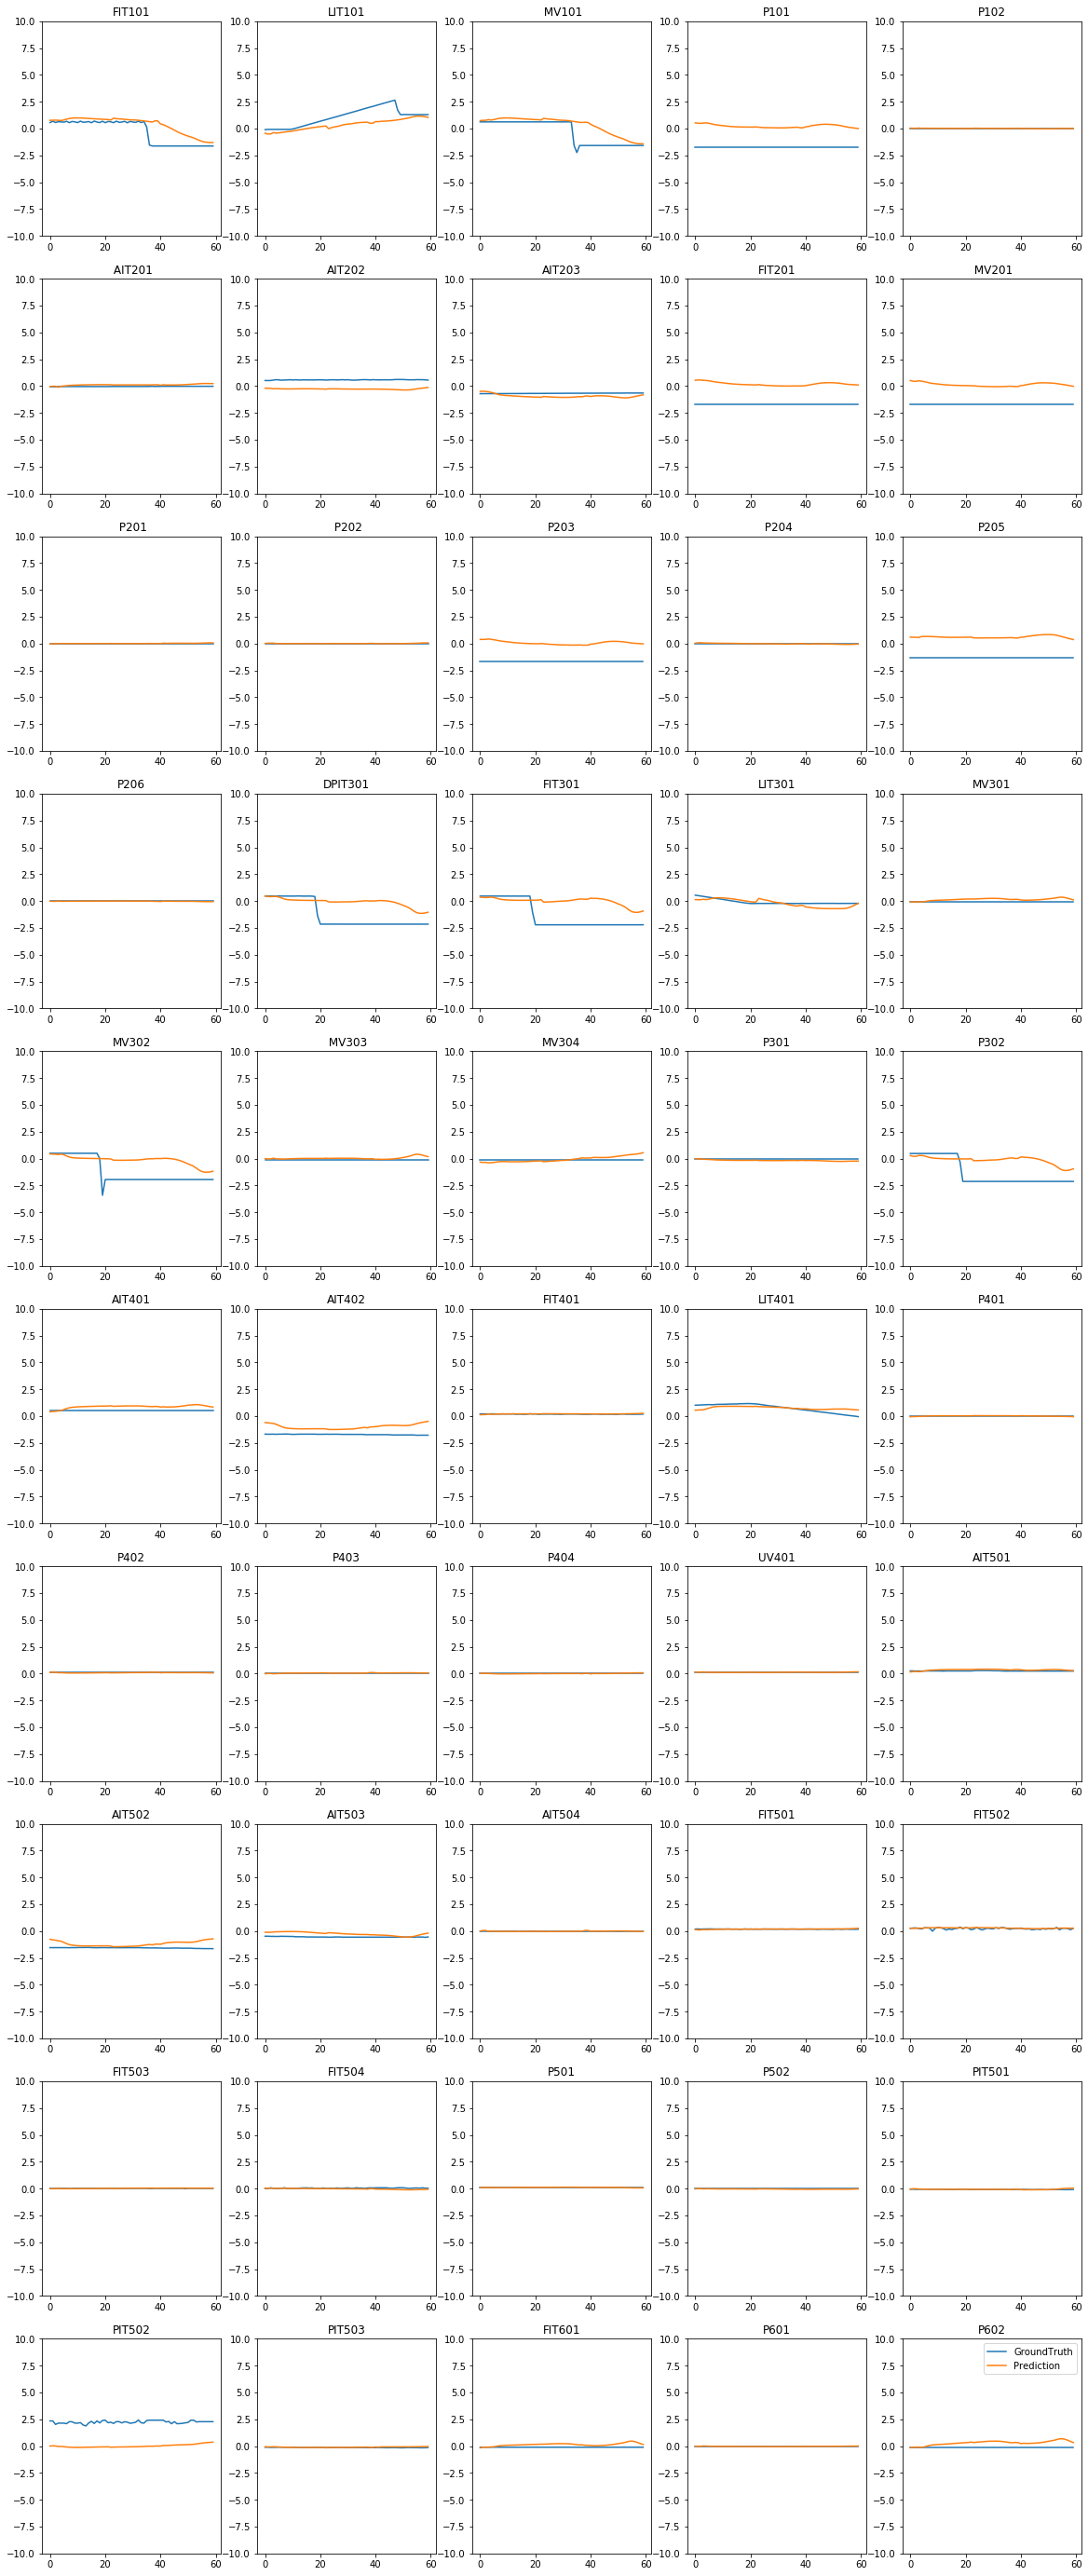

In [28]:
# StandardScaler
# lr=0.0001
# args.seq_len = 6*60*3, args.label_len = 6*60, args.pred_len = 6*30 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 50))

idx = 2
 
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.ylim([-10.0, 10.0])    
    plt.plot(val_trues[idx,:,i], label='GroundTruth')
    plt.plot(val_preds[idx,:,i], label='Prediction')
    plt.title(f'{norm_data.columns[i]}')

print(list(val_label.iloc[idx*60:(idx+1)*60, 0]))
plt.legend()
plt.show()

In [32]:
path = './results/anomaly/'+setting
#val_preds = np.load(path+'/val_pred.npy')
#val_trues = np.load(path+'/val_true.npy')
test_preds = np.load(path+'/test_pred.npy')
test_trues = np.load(path+'/test_true.npy')

NameError: name 'test_trues' is not defined

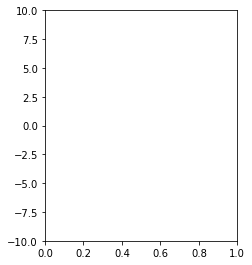

In [1]:
# StandardScaler
# lr=0.0001
# args.seq_len = 6*60*3, args.label_len = 6*60, args.pred_len = 6*30 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 50))

idx = 10
 
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.ylim([-10.0, 10.0])    
    plt.plot(test_trues[idx,:,i], label='GroundTruth')
    plt.plot(test_preds[idx,:,i], label='Prediction')
    plt.title(f'{norm_data.columns[i]}')


plt.legend()
plt.show()

## 3. Anomaly detection

In [6]:
import pandas as pd
import numpy as np

In [13]:
val_test_split = 6*60*48
setting = 'informer_SWaT_ftM_sl360_ll180_pl60_dm512_nh8_el4_dl2_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'

In [14]:
df_y = pd.read_csv("./dataset/SWaT/SWaT_Attack_label.csv")
df_y.date = pd.to_datetime(df_y.date)
df_y = df_y.set_index('date')

val_label = df_y[args.seq_len:val_test_split]
test_label = df_y[val_test_split:]

path = './results/anomaly/'+setting
val_preds = np.load(path+'/val_pred.npy').reshape(-1,args.c_out)
val_trues = np.load(path+'/val_true.npy').reshape(-1,args.c_out)
test_preds = np.load(path+'/test_pred.npy').reshape(-1,args.c_out)
test_trues = np.load(path+'/test_true.npy').reshape(-1,args.c_out)

val_err = np.abs(val_preds-val_trues)
test_err = np.abs(test_preds-test_trues)

In [34]:
val_label = [i[0] for i in val_label.values]
test_label = [i[0] for i in test_label.values]
val_label = np.array(val_label)
test_label = np.array(test_label)

all_data = np.vstack((val_err, test_err))
all_label = np.hstack((val_label, test_label))
val_err = all_data[:int(all_data.shape[0]*0.3)]
val_label = all_label[:int(all_data.shape[0]*0.3)]
test_err = all_data[int(all_data.shape[0]*0.3):]
test_label = all_label[int(all_data.shape[0]*0.3):]

In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(51,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               6656      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [15]:
val_label = [i[0] for i in val_label.values]
test_label = [i[0] for i in test_label.values]
val_label = np.array(val_label)
test_label = np.array(test_label)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(51,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(val_err, val_label, epochs=11, batch_size=32)

pred = np.argmax(model.predict(test_err), axis=1)
true = test_label

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
f1 = f1_score(true, pred)
recall = recall_score(true, pred)
precision = precision_score(true, pred)
f1, recall, precision

Epoch 1/11
529/529 [==============================] - 2s 3ms/step - loss: 0.4859 - accuracy: 0.7861
Epoch 2/11
529/529 [==============================] - 1s 3ms/step - loss: 0.1937 - accuracy: 0.9495
Epoch 3/11
529/529 [==============================] - 1s 3ms/step - loss: 0.1730 - accuracy: 0.9524
Epoch 4/11
529/529 [==============================] - 1s 2ms/step - loss: 0.1665 - accuracy: 0.9506
Epoch 5/11
529/529 [==============================] - 1s 3ms/step - loss: 0.1611 - accuracy: 0.9523
Epoch 6/11
529/529 [==============================] - 1s 2ms/step - loss: 0.1558 - accuracy: 0.9524
Epoch 7/11
529/529 [==============================] - 1s 3ms/step - loss: 0.1410 - accuracy: 0.9574
Epoch 8/11
529/529 [==============================] - 1s 3ms/step - loss: 0.1467 - accuracy: 0.9548
Epoch 9/11
529/529 [==============================] - 1s 3ms/step - loss: 0.1341 - accuracy: 0.9575
Epoch 10/11
529/529 [==============================] - 1s 3ms/step - loss: 0.1302 - accuracy: 0.9606

(0.8657282079047104, 0.765438008616563, 0.9962616822429906)

In [14]:
confusion_matrix(true, pred)

array([[21614,    26],
       [ 1144,  3136]])